# Visualization - Stephenie

> COMP 4710 Group 11 - Progress Report 1

## Objective

- Create interactive Kepler.gl maps of stops and network
- Generate coverage bar charts and distribution plots
- Export summary statistics for the report
- Save all visualizations to reports/figures/

## Setup

In [1]:
# Standard imports
import os
from pathlib import Path


REPO_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
FIGURES = REPO_ROOT / "reports" / "figures"
FIGURES.mkdir(parents=True, exist_ok=True)

print("cwd:", Path.cwd())
print("saving figures to:", FIGURES)

# Project imports 
from ptn_analysis.analysis.visualization import (
    get_stops_with_coords,
    get_edges_with_routes,
    get_neighbourhood_coverage,
    create_unified_map,
    create_coverage_bar_chart,
    create_coverage_distribution_plot,
    export_summary_stats,
    create_route_performance_chart,
)

cwd: /Users/stephanie/ywg-ptn-analysis-4710-g11/notebooks
saving figures to: /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures


In [2]:
stops = get_stops_with_coords()
edges = get_edges_with_routes()
coverage = get_neighbourhood_coverage()

print(f"Loaded {len(stops):,} stops, {len(edges):,} edges, {len(coverage):,} neighbourhoods")
display(stops.head())
display(edges.head())
display(coverage.head())

2026-02-06 09:43:22.459 | INFO     | ptn_analysis.data.db:get_duckdb:42 - Connected to DuckDB at /Users/stephanie/ywg-ptn-analysis-4710-g11/data/processed/wpg_transit.duckdb


Loaded 3,873 stops, 4,427 edges, 237 neighbourhoods


,stop_id,stop_name,stop_lat,stop_lon,route_count
0,10001,Southbound Osborne at Mulvey,49.871261,-97.139518,1.0
1,10002,Southbound Osborne at Glasgow,49.868819,-97.137553,1.0
2,10003,Southbound Osborne at Brandon,49.867880,-97.136795,1.0
3,10005,Southbound Osborne at Morley,49.865164,-97.134604,1.0
4,10006,Southbound Osborne at Maplewood,49.863250,-97.133063,2.0


,from_stop_id,to_stop_id,from_lat,from_lon,to_lat,to_lon,trip_count,route_count
0,40438,40439,49.914388,-97.120906,49.915410,-97.124001,105,1
1,40439,30082,49.915410,-97.124001,49.916796,-97.129032,105,1
2,30315,30470,49.927406,-97.153479,49.928949,-97.158311,107,1
3,30589,30586,49.950211,-97.168945,49.948486,-97.165679,177,2
4,30390,30388,49.949408,-97.160862,49.952701,-97.160862,107,1


,neighbourhood,area_km2,stop_count,stops_per_km2
0,Rossmere-A,0.0,64,NaN
1,St. James Industrial,0.0,61,NaN
2,Windsor Park,0.0,60,NaN
3,River Park South,0.0,59,NaN
4,Inkster Industrial Park,0.0,57,NaN


## Interactive Maps

YOUR CODE HERE - Implement create_stop_map() and create_network_edge_map()

In [3]:
create_unified_map(
    layers=["stops", "edges", "coverage"],
    output_path=str(FIGURES / "transit_map.html")
)

print("Saved:", FIGURES / "transit_map.html")

2026-02-06 09:43:38.465 | INFO     | ptn_analysis.analysis.visualization:get_neighbourhood_geodata:195 - Fetching neighbourhood geometry from https://data.winnipeg.ca/api/v3/views/8k6x-xxsy/query.geojson
2026-02-06 09:43:39.248 | ERROR    | ptn_analysis.analysis.visualization:get_neighbourhood_geodata:221 - Error loading neighbourhood geometry: HTTP Error 403: Forbidden


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/stephanie/ywg-ptn-analysis-4710-g11/.venv/lib/python3.11/site-packages/keplergl/keplergl.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string
2026-02-06 09:43:39.504 | INFO     | ptn_analysis.analysis.visualization:create_unified_map:403 - Saved unified Kepler map to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/transit_map.html


Map saved to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/transit_map.html!
Saved: /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/transit_map.html


In [4]:
create_unified_map(
    layers=["edges"],
    output_path=str(FIGURES / "network_map.html")
)
print("Saved:", "reports/figures/network_map.html")

2026-02-06 09:45:30.982 | INFO     | ptn_analysis.analysis.visualization:create_unified_map:403 - Saved unified Kepler map to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/network_map.html


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/network_map.html!
Saved: reports/figures/network_map.html


## Coverage Charts

YOUR CODE HERE - Implement create_coverage_bar_chart() and create_coverage_distribution_plot()

In [5]:
create_coverage_bar_chart(
    top_n=20,
    output_path=str(FIGURES / "coverage_bar.png")
)
print("Saved:", FIGURES / "coverage_bar.png")

create_coverage_distribution_plot(
    output_path=str(FIGURES / "coverage_dist.png")
)
print("Saved:", FIGURES / "coverage_dist.png")

2026-02-06 09:53:15.874 | INFO     | ptn_analysis.analysis.visualization:create_coverage_bar_chart:256 - Saved coverage bar chart to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/coverage_bar.png
2026-02-06 09:53:15.947 | INFO     | ptn_analysis.analysis.visualization:create_coverage_distribution_plot:281 - Saved coverage distribution plot to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/coverage_dist.png


Saved: /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/coverage_bar.png
Saved: /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/coverage_dist.png


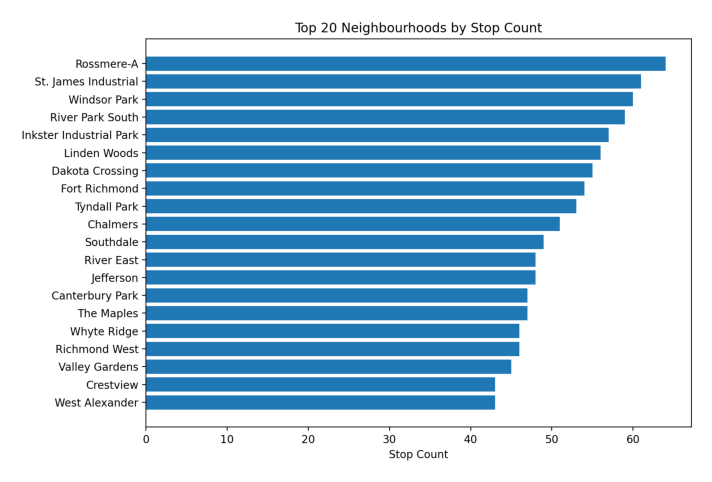

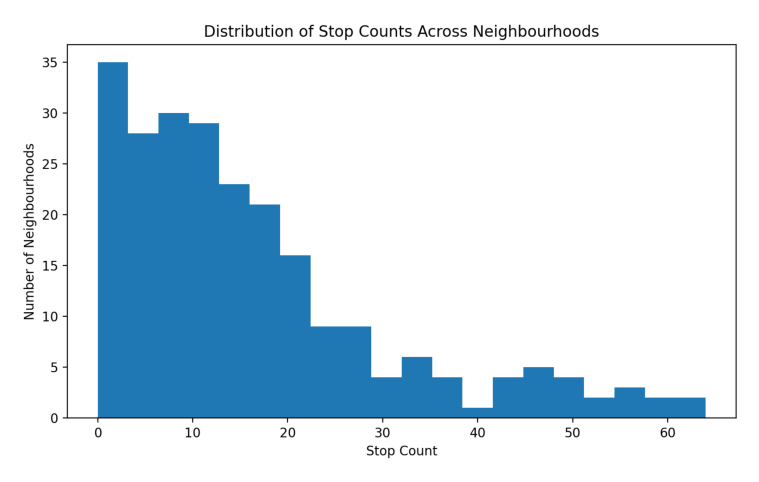

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

for img in ["coverage_bar.png", "coverage_dist.png"]:
    path = FIGURES / img
    if path.exists():
        plt.figure(figsize=(10,6))
        plt.imshow(Image.open(path))
        plt.axis("off")
        plt.show()

In [7]:
create_route_performance_chart(
    top_n=20,
    output_path=str(FIGURES / "route_performance.png")
)
print("Saved:", FIGURES / "route_performance.png")

2026-02-06 09:53:21.422 | INFO     | ptn_analysis.analysis.visualization:create_route_performance_chart:366 - Saved route performance chart to /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/route_performance.png


Saved: /Users/stephanie/ywg-ptn-analysis-4710-g11/reports/figures/route_performance.png


## Summary Statistics

YOUR CODE HERE - Implement export_summary_stats()

In [8]:
stats = export_summary_stats()
stats
print("Summary Stats")
for k, v in stats.items():
    print(f"- {k}: {v}")

Summary Stats
- num_stops: 3873
- num_edges: 4427
- neighbourhoods_n: 237
- total_stops_in_neighbourhoods: 3873
- stops_per_km2_min: nan
- stops_per_km2_median: nan
- stops_per_km2_max: nan


/Users/stephanie/ywg-ptn-analysis-4710-g11/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Results Summary

| Output | Path | Description |
|--------|------|-------------|
| Stop map | reports/figures/stops_map.html | Interactive stop locations |
| Network map | reports/figures/network_map.html | Transit connections |
| Bar chart | reports/figures/coverage_bar.png | Top neighbourhoods |
| Distribution | reports/figures/coverage_dist.png | Stop count histogram |
| Performant chart | reports/figures/route_performance.png | Top Routes by Pass-ups |

## Interpretation

The visualizations provide insight into the spatial structure and service distribution of Winnipeg Transit under the Primary Transit Network redesign. By examining stop locations, network connections, and neighbourhood-level coverage, the maps help illustrate how transit service is organized across the city and where disparities in access may exist.

Visual insights:

1.	*Transit service* is strongly concentrated in central Winnipeg and along major corridors
The transit map shows a high concentration of stops and connections in the city core, particularly downtown and in surrounding neighbourhoods. This pattern suggests that central areas function as key hubs within the network, supporting higher levels of connectivity and facilitating transfers between routes. Such concentration is consistent with a spine-and-feeder model, where primary corridors receive denser service.

2. *The network* exhibits a largely grid-based structure with higher connectivity on primary routes
The network visualization reveals a clear grid-like pattern across much of the city, with stronger and more continuous connections along major east–west and north–south routes. These well-connected corridors likely represent high-frequency or high-demand routes, indicating where transit reliability and capacity are prioritized within the system.


3. *Neighbourhood-level coverage* varies considerably across the city
Coverage metrics indicate that while most neighbourhoods are served by transit, the density of stops differs substantially. Some neighbourhoods contain many stops relative to their area, whereas others have far fewer, suggesting uneven levels of local accessibility. This variation highlights potential service gaps and points to areas that may benefit from improved transit coverage or connectivity.